In [8]:
import pandas as pd
import math

#Memasukkan data kedalam python
df = pd.read_csv('D:/Geoteknik/data32.txt', sep = ";")
#print(df)

#print(df['HZA(d;m;s)'], sep = ";")

HZA_d = df['HZA(d)'].tolist()
HZA_m = df['HZA(m)'].tolist()
HZA_s = df['HZA(s)'].tolist()

HZB_d = df['HZB(d)'].tolist()
HZB_m = df['HZB(m)'].tolist()
HZB_s = df['HZB(s)'].tolist()

VZA_d = df['VZA(d)'].tolist()
VZA_m = df['VZA(m)'].tolist()
VZA_s = df['VZA(s)'].tolist()

VZB_d = df['VZB(d)'].tolist()
VZB_m = df['VZB(m)'].tolist()
VZB_s = df['VZB(s)'].tolist()



#Mengubah menit ke derajat
def menit(m):
    menit_d=[]
    for i in range (len(m)):
        menit= (m[i]/60)
        #print(menit)
        menit_d.append(menit)
    return menit_d

HZA_menit_ke_derajat = menit(HZA_m)
HZB_menit_ke_derajat = menit(HZB_m)
VZA_menit_ke_derajat = menit(VZA_m)
VZB_menit_ke_derajat = menit(VZB_m)

#Mengubah detik ke derajat
def detik(a):
    detik_d=[]
    for i in range (len(a)):
        detik= (a[i]/3600)
        #print(menit)
        detik_d.append(detik)
    return detik_d

HZA_detik_ke_derajat = detik(HZA_d)
HZB_detik_ke_derajat = detik(HZB_d)
VZA_detik_ke_derajat = detik(VZA_d)
VZB_detik_ke_derajat = detik(VZB_d)

#Mengubah menjadi sudut derajat
def sudut(a,b,c):
    sudut_fix = []
    for i in range (len(a)):
        sudut = a[i]+b[i]+c[i]
        sudut_fix.append(sudut)
    return sudut_fix

sudut_HZA = sudut(HZA_d,HZA_menit_ke_derajat,HZA_detik_ke_derajat)
sudut_HZB = sudut(HZB_d,HZB_menit_ke_derajat,HZB_detik_ke_derajat)
sudut_VZA = sudut(VZA_d,VZA_menit_ke_derajat,VZA_detik_ke_derajat)
sudut_VZB = sudut(VZB_d,VZB_menit_ke_derajat,VZB_detik_ke_derajat)

Koordinat_Ax = 30
Koordinat_Ay = 10
Koordinat_Az = 50
Koordinat_Bx = 90
Koordinat_By = 70
Koordinat_Bz = 60
Tinggi_alat = 1.5

jarak_AB = math.sqrt((Koordinat_Ax - Koordinat_Bx)**2 + (Koordinat_Ay - Koordinat_By)**2)
#print(jarak_AB)

#Membuat sudut titik target lereng
def sudutLereng(a,b):
    sudut_lereng = []
    for i in range (len(a)):
        sudut_titik_lereng = 180 - (a[i] + b[i])
        sudut_lereng.append(sudut_titik_lereng)
    return sudut_lereng

sudut_lereng = sudutLereng(sudut_HZA,sudut_HZB)

#Menghitung jarak titik ke lereng
Jarak_Titik_A_Ke_Lereng = []
Jarak_Titik_B_Ke_Lereng = []

for i in range (len(sudut_HZB)):
    Jarak_TitikA_Ke_Lereng = jarak_AB * math.sin(math.radians(sudut_HZB[i])) / (math.sin(math.radians(sudut_lereng[i])))
    Jarak_Titik_A_Ke_Lereng.append(Jarak_TitikA_Ke_Lereng)

for i in range (len(sudut_HZA)):
    Jarak_TitikB_Ke_Lereng = jarak_AB * math.sin(math.radians(sudut_HZA[i])) / (math.sin(math.radians(sudut_lereng[i])))
    Jarak_Titik_B_Ke_Lereng.append(Jarak_TitikB_Ke_Lereng)

    
#mencari Azimuth AB
Azimuth_AB_Radian = math.atan((Koordinat_Bx-Koordinat_Ax)/(Koordinat_By-Koordinat_Ay))
Azimuth_AB_Derajat = math.degrees(Azimuth_AB_Radian)

Sudut_Azimuth_A_Ke_Lereng = []
Sudut_Azimuth_B_Ke_Lereng = []

for i in range (len(sudut_HZA)):
    sudut_azimuth_a_ke_lereng = Azimuth_AB_Derajat + sudut_HZA[i]
    Sudut_Azimuth_A_Ke_Lereng.append(sudut_azimuth_a_ke_lereng)

for i in range (len(sudut_HZB)):
    sudut_azimuth_b_ke_lereng = Azimuth_AB_Derajat + 180 - sudut_HZB[i]
    Sudut_Azimuth_B_Ke_Lereng.append(sudut_azimuth_b_ke_lereng)


#Menghitung Koordinat x dan y
def KoordinatXLereng(a,b,c):
    Koordinat_x_Lereng = []
    for i in range (len(b)):
        Koor_x = a + (b[i] * math.sin(math.radians(c[i])))
        Koordinat_x_Lereng.append(Koor_x)
    return Koordinat_x_Lereng

Koordinat_x_Lereng_Dari_Titik_A = KoordinatXLereng(Koordinat_Ax,Jarak_Titik_A_Ke_Lereng,Sudut_Azimuth_A_Ke_Lereng)
Koordinat_x_Lereng_Dari_Titik_B = KoordinatXLereng(Koordinat_Bx,Jarak_Titik_B_Ke_Lereng,Sudut_Azimuth_B_Ke_Lereng)

def KoordinatYLereng(a,b,c):
    Koordinat_y_Lereng = []
    for i in range (len(b)):
        Koor_y = a + (b[i] * math.cos(math.radians(c[i])))
        Koordinat_y_Lereng.append(Koor_y)
    return Koordinat_y_Lereng

Koordinat_y_Lereng_Dari_Titik_A = KoordinatYLereng(Koordinat_Ay,Jarak_Titik_A_Ke_Lereng,Sudut_Azimuth_A_Ke_Lereng)
Koordinat_y_Lereng_Dari_Titik_B = KoordinatYLereng(Koordinat_By,Jarak_Titik_B_Ke_Lereng,Sudut_Azimuth_B_Ke_Lereng)

#Menghitung rata-rata koordinat x dan y
def Rata2Koordinat(a,b):
    rata_rata_koor = []
    for i in range (len(a)):
        rata_rata = (a[i]+b[i])/2
        rata_rata_koor.append(rata_rata)
    return rata_rata_koor

Rata_rata_Koordinat_x_Lereng = Rata2Koordinat(Koordinat_x_Lereng_Dari_Titik_A,Koordinat_x_Lereng_Dari_Titik_B)
Rata_rata_Koordinat_y_Lereng = Rata2Koordinat(Koordinat_y_Lereng_Dari_Titik_A,Koordinat_y_Lereng_Dari_Titik_B)

#Mencari tinggi (Koordinat z)

def TinggiLereng(a,b,c):
    Koordinat_z_Lereng = []
    for i in range (len(b)):
        tinggi_lereng = a + b[i] * math.tan(math.radians(c[i])) + Tinggi_alat
        Koordinat_z_Lereng.append(tinggi_lereng)
    return Koordinat_z_Lereng

Koordinat_z_Lereng_Dari_Titik_A = TinggiLereng(Koordinat_Az,Jarak_Titik_A_Ke_Lereng,sudut_VZA)
Koordinat_z_Lereng_Dari_Titik_B = TinggiLereng(Koordinat_Bz,Jarak_Titik_B_Ke_Lereng,sudut_VZB)

#Menghitung rata-rata koordinat x dan y
Rata_rata_Koordinat_z_Lereng = Rata2Koordinat(Koordinat_z_Lereng_Dari_Titik_A,Koordinat_z_Lereng_Dari_Titik_B)

#Mencari koordinat x dan y menjadi jarak
Jarak_antar_titik = []
for i in range (len(Rata_rata_Koordinat_x_Lereng)):
    if i <= (len(Rata_rata_Koordinat_x_Lereng) - 2):
        jarak = math.sqrt ( ((Rata_rata_Koordinat_x_Lereng[i]-Rata_rata_Koordinat_x_Lereng[i+1])**2) + ((Rata_rata_Koordinat_y_Lereng[i]-Rata_rata_Koordinat_y_Lereng[i+1])**2) )
        Jarak_antar_titik.append(jarak)
    else:
        pass

Jarak_pada_penampang = []
s = 0
for i in Jarak_antar_titik:
    s += i  # s = s+i
    Jarak_pada_penampang.append(s)

Jarak_pada_penampang = [0] + Jarak_pada_penampang


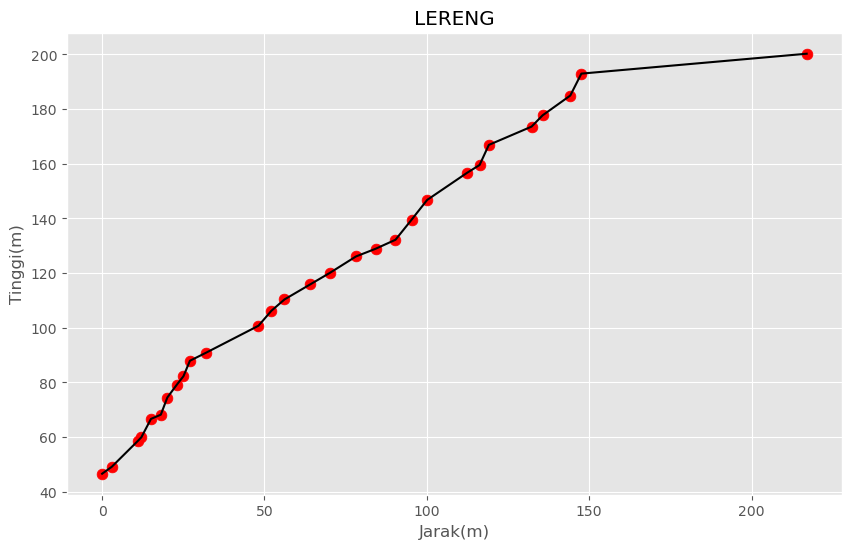

In [9]:
##Sumbu x = Jarak_pada_penampang
##Sumbu y = Rata_rata_Koordinat_z_Lereng

import matplotlib.pyplot as plt

#memplotkan hasil
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(Jarak_pada_penampang, Rata_rata_Koordinat_z_Lereng, c='Black')
plt.scatter(Jarak_pada_penampang, Rata_rata_Koordinat_z_Lereng,c='Red',s=60)
plt.title('LERENG')
plt.xlabel('Jarak(m)')
plt.ylabel('Tinggi(m)')
plt.show()